In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [76]:
X, y = make_blobs(n_samples = 500, n_features=2, centers=5, random_state=3)

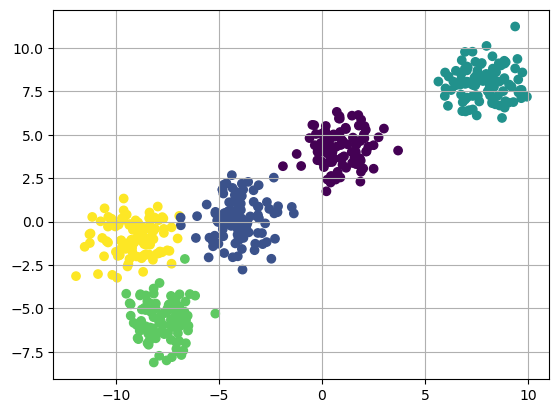

In [77]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c = y)

In [78]:
k = 5

colors = ['green', 'yellow', 'blue', 'cyan', 'red']

clusters = {}

for idx in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center': center,
        'points': [],
        'color': colors[idx]
    }
    
    clusters[idx] = cluster

clusters

{0: {'center': array([-2.30024813,  0.31123845]),
  'points': [],
  'color': 'green'},
 1: {'center': array([6.32521134, 0.26638543]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-0.875311  ,  7.40190631]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-7.87996465, -1.93164202]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-3.37135705,  4.90158902]),
  'points': [],
  'color': 'red'}}

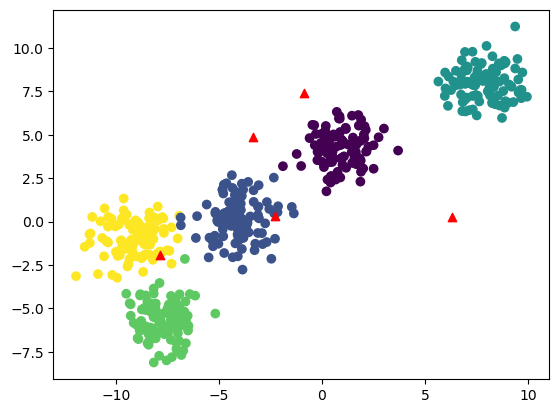

In [79]:
plt.scatter(X[:,0], X[:,1], c = y)

for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker = '^', c = 'red')

In [80]:
def euclidian_dist(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [81]:
v1 = np.array([1, 2])
v2 = np.array([3, 4])
euclidian_dist(v1, v2)

2.8284271247461903

In [86]:
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try : 
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c = 'black',marker = '^')
    plt.show()

In [94]:
# Implementing E step
def assign_clusters():
    """
    X (n_samples, n_features) -> (500, 2)
    curr_x (x_cordinate, y_cordinate) for that one sample
    k n_clusters -> 5
    """
    
    for idx in range(X.shape[0]):
        dist = []
        
        # choosing a point(sample)
        curr_x = X[idx]
        
        # compute the distance of this sample from all the centers
        for i in range(k):
            dis = euclidian_dist(curr_x, clusters[i]['center'])
            dist.append(dis)
        
        # the center with min distance form the point has it's color assigned to the point
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

In [95]:
# Implementing M-step
def update_clusters():
    """
    X (n_samples, n_features) -> (500, 2)
    curr_x (x_cordinate, y_cordinate) for that one sample
    k n_clusters -> 5
    """
    
    # iterating over the 5 colors    
    for idx in range(k):
        
        # pts has all the points correspoing to that color
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0] > 0:
            
            # calcualting the new center
            new_center = pts.mean(axis = 0)
            # assigning the new center
            clusters[idx]['center'] = new_center
            
            # clearing the points for the new set of iterations
            clusters[idx]['points'] = []


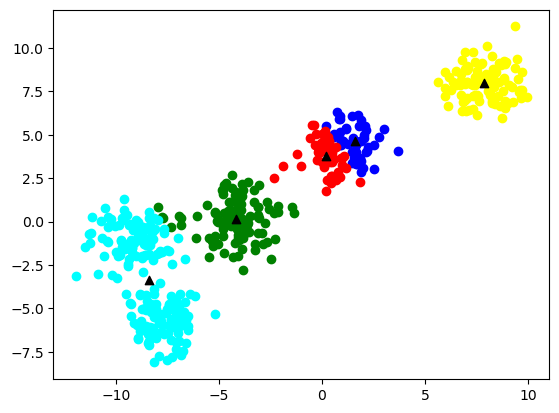

In [96]:
assign_clusters()
plot_clusters()
update_clusters()

## Scikit Learn K - Means

In [97]:
from sklearn.cluster import KMeans

In [100]:
model = KMeans(n_clusters = 5, n_init='auto')
model.fit(X, y)

c:\Users\rishi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, n_init='auto')

In [103]:
centers = model.cluster_centers_

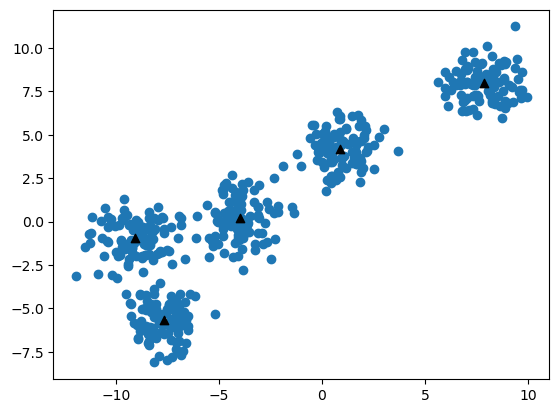

In [104]:
plt.scatter(X[:,0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', marker = '^')